<a href="https://colab.research.google.com/github/axypx06/Emotion-Classification/blob/main/task_emotions_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , LSTM , Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import pickle

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("emotions.csv")
data.head(20)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4.0
1,1,ive enjoyed being able to slouch about relax a...,0.0
2,2,i gave up my internship with the dmrg and am f...,4.0
3,3,i dont know i feel so lost,0.0
4,4,i am a kindergarten teacher and i am thoroughl...,4.0
5,5,i was beginning to feel quite disheartened,0.0
6,6,i would think that whomever would be lucky eno...,2.0
7,7,i fear that they won t ever feel that deliciou...,1.0
8,8,im forever taking some time out to have a lie ...,5.0
9,9,i can still lose the weight without feeling de...,0.0


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.shape


(29407, 3)

In [ ]:



# Drop the specified column
data.drop(columns=["Unnamed: 0"], inplace=True)

# Display the data with the removed column
data.head(20)

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0
5,i was beginning to feel quite disheartened,0.0
6,i would think that whomever would be lucky eno...,2.0
7,i fear that they won t ever feel that deliciou...,1.0
8,im forever taking some time out to have a lie ...,5.0
9,i can still lose the weight without feeling de...,0.0


In [ ]:
data.isna().sum().to_frame(name='# of missing values')

,# of missing values
text,0
label,1


**Remove duplicate rows**


In [ ]:
import numpy as np
total_rows =  data.shape[0]
a =  data.shape[0]
data.drop_duplicates(inplace=True, subset=['label','text'])
b = data.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed: {np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining: {np.round((b/total_rows)*100,2)}%")

No. of rows removed : 6

Percentage of data removed: 0.02%
Percentage of data remaining: 99.98%


**Create target column using label**


In [ ]:

import pandas as pd

def create_target(x):
    if x == 0:
        return "sadness"
    elif x == 1:
        return "joy"
    elif x == 2:
        return "love"
    elif x == 3:
        return "anger"
    elif x == 4:
        return "fear"
    elif x == 5:
        return "surprise"
    else:
        return "Unknown"

data.loc[:, 'target'] = data.label.apply(create_target)


In [ ]:
data[['label', 'target']].sample(20)

,label,target
15944,3.0,anger
13886,4.0,fear
17904,0.0,sadness
12441,1.0,joy
22625,1.0,joy
176,3.0,anger
25938,1.0,joy
7813,1.0,joy
10380,1.0,joy
25958,1.0,joy


**Data Pre-processing**

---



In [ ]:

import nltk


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

#
final_stopwords.add("one")
print(final_stopwords)

{'you', 'aren', 'very', 'up', 'down', 'between', 'and', 'him', 'had', 'o', 'is', 'above', "she's", 'being', 'of', 'most', 'ain', 'under', 'am', 'yourselves', 'below', 'where', 'about', 'itself', 'against', 'its', 'whom', 'again', 'won', 'was', "you're", "should've", 'which', 'so', 'i', 'hers', 'weren', 'yours', 'here', 'for', 'wouldn', 's', 'her', 'doing', 'don', "that'll", 'couldn', 'some', 'too', 'have', 'theirs', 'needn', 'to', 'in', 'why', 'on', 'from', 'more', 'mustn', 'herself', 'wasn', 'own', "you'll", 'themselves', 'those', 'once', 'we', 'out', 'ours', 'the', 'shan', 'isn', 'because', 'both', 'yourself', 'during', 'but', 'or', 'who', 'his', 'them', 'each', 'just', 'by', 'into', 'does', 'there', 'with', 'other', 'only', 'didn', 'all', 'do', 'than', 'mightn', 'it', "you'd", 'me', 'my', 'she', 'himself', 'how', 've', 'hadn', 'through', 'haven', 'at', 'such', 'he', 'they', 'one', 'same', 'shouldn', 'll', 'are', 'm', 'did', 'that', 'few', 'if', 'before', 't', "it's", 'their', 'after

**Word clouds**

---



In [ ]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)

    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

In [ ]:
import wordcloud
import numpy as np

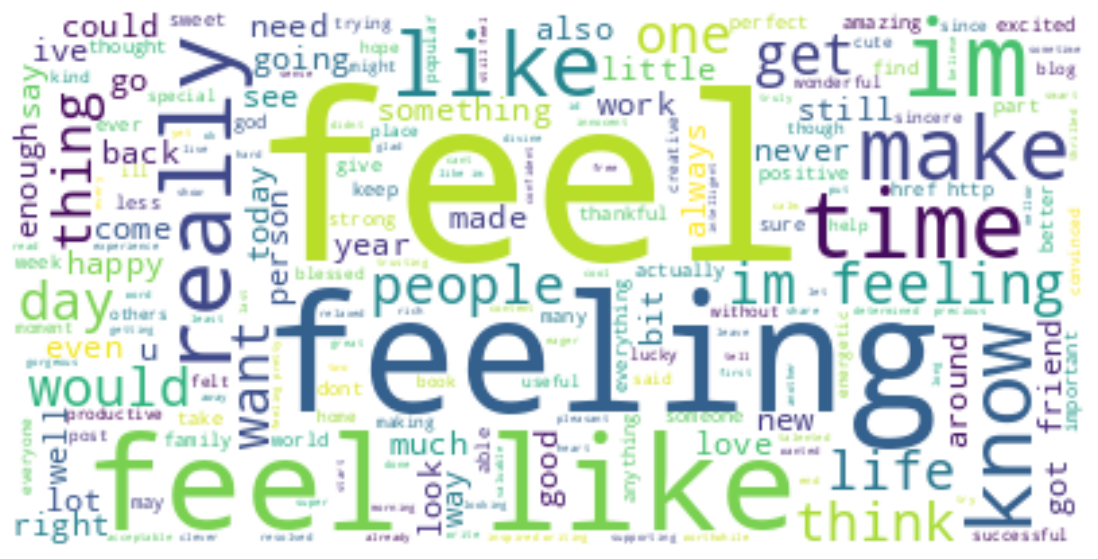

In [ ]:
from wordcloud import WordCloud
STOPWORDS = set(stopwords.words('english'))
pos = data.loc[data.target=="joy"].text
text1 = " ".join(review for review in pos.astype(str))

generate_wcloud(text1)

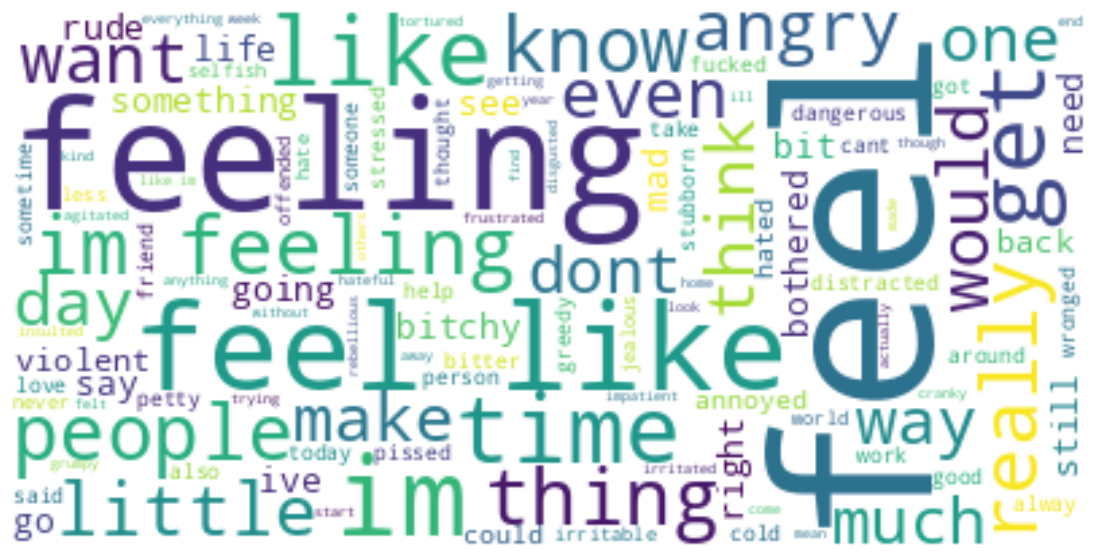

In [ ]:
pos = data.loc[data.target=="anger"].text
text1 = " ".join(review for review in pos.astype(str))

generate_wcloud(text1)

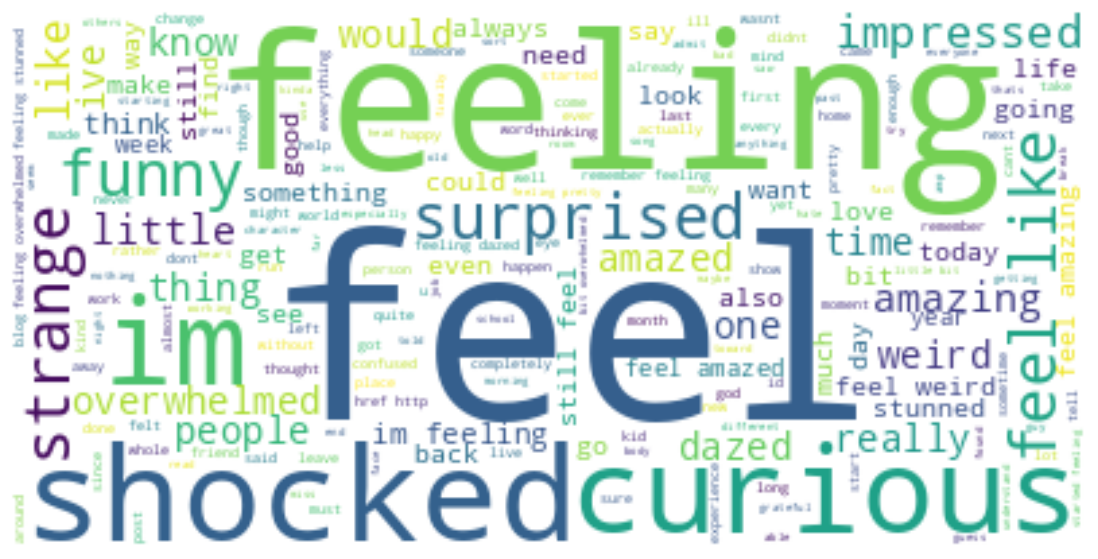

In [ ]:
pos = data.loc[data.target=="surprise"].text
text1 = " ".join(review for review in pos.astype(str))

generate_wcloud(text1)

**Train Test Split**

---



In [ ]:
from sklearn.model_selection import train_test_split
X = data.text
y = data.target

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.20, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((23520,), (5881,))

**Vectorization**

---



Bag of Words Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

TF-IDF Vectorizer

In [ ]:
import sklearn
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Unknown', 'anger', 'fear', 'joy', 'love', 'sadness', 'surprise']


**Model Training**

---



In [ ]:
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

Logistic Regression with BoW

In [ ]:
# Hyperparameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
C = [0.001, 0.01, 0.1]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.47691326530612244
Test accuracy score : 0.4582553987417106

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6688350340136054
Test accuracy score : 0.627104233973814

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.932312925170068
Test accuracy score : 0.8743410984526441

 ----------------------------------------


Logistic Regression with Tf-Idf

In [ ]:
# Hyperparameters
C = [0.001, 0.01, 0.1]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.33784013605442176
Test accuracy score : 0.3339568100663153

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.4951955782312925
Test accuracy score : 0.4817207957830301

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7068877551020408
Test accuracy score : 0.6719945587485121

 ----------------------------------------


**Model Evaluation**

In [ ]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)

    return plt.show()


In [ ]:
bmodel = LogisticRegression(C=0.1, max_iter=500, random_state=1)
bmodel.fit(bow_X_train, y_train)

LogisticRegression(C=0.1, max_iter=500, random_state=1)

In [ ]:
tfidf_model=LogisticRegression(C=0.1, max_iter=500, random_state=1)
tfidf_model.fit(tfidf_X_train,y_train)

LogisticRegression(C=0.1, max_iter=500, random_state=1)

In [ ]:
# predictions
y_preds_train_1 = bmodel.predict(bow_X_train)
y_preds_test_1 = bmodel.predict(bow_X_test)

In [ ]:
y_preds_train_2 = tfidf_model.predict(bow_X_train)
y_preds_test_2 = tfidf_model.predict(bow_X_test)

In [ ]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train_1)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test_1)}")

Train accuracy score : 0.932312925170068
Test accuracy score : 0.8743410984526441


In [ ]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train_2)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test_2)}")

Train accuracy score : 0.7605017006802721
Test accuracy score : 0.7114436320353681


**Confusion Matrix**

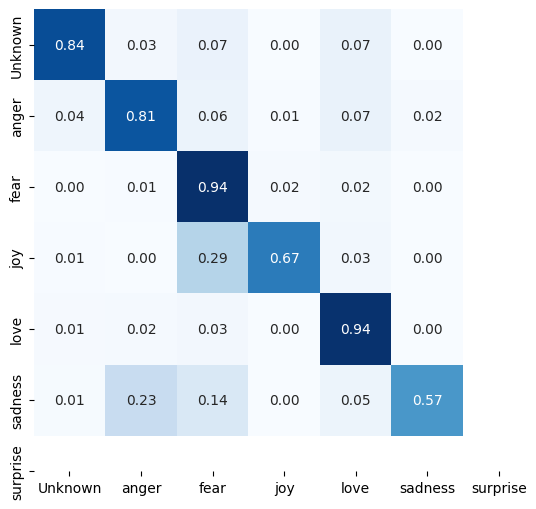

In [ ]:
import seaborn as sns
plot_cm(y_test, y_preds_test_1)

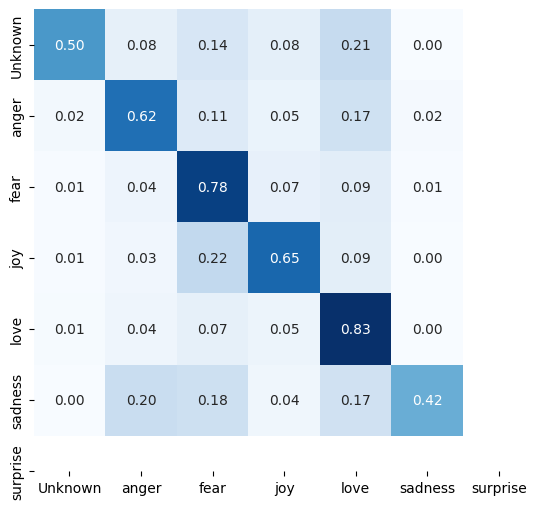

In [ ]:
import seaborn as sns
plot_cm(y_test, y_preds_test_2)

**Deployment**

---



In [ ]:

import pickle
with open("transformer.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)

with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [ ]:
import pickle
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("model.pkl", "wb") as f:
    pickle.dump(tfidf_model, f)

In [ ]:
def get_sentiment_1(review):
    # preprocessing
    x = review
    #vectorization
    x = bow_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [ ]:
def get_sentiment_2(review):
    # preprocessing
    x = review
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(tfidf_model.predict(x.reshape(1,-1)))
    return labels[y]

In [ ]:

review = "This chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment_1(review)} review!")

This is a joy review!


In [ ]:
review = "i was amazed!"
print(f"This is a {get_sentiment_1(review)} emotion!")

This is a surprise emotion!


In [ ]:
review = "I loved this!"
print(f"This is a {get_sentiment_2(review)} emotion!")

This is a love emotion!


In [ ]:
review="i dont know i feel so lost"
print(f"This is a {get_sentiment_2(review)} emotion!")

This is a sadness emotion!


In [ ]:
review="Digusting !Just had the worst experience at XYZ Airlines! Flight delayed for hours without any proper explanation or updates. Staff were rude and unhelpful. Absolutely unacceptable! #XYZAirlines #CustomerServiceFail"
print(f"This is a {get_sentiment_1(review)} emotion!")

This is a anger emotion!


In [ ]:
review="Pitch-black room, strange noises echoing. Goosebumps rise, heart races. Is something watching me? #fear #darkness"
print(f"This is a {get_sentiment_1(review)} emotion!")

This is a fear emotion!


In [ ]:
review="i feel a bit intimidated and out of my league due to his experience"
print(f"This is a {get_sentiment_2(review)} emotion!")


This is a fear emotion!
